<a href="https://colab.research.google.com/github/Bekamgenene/Elevvo-Internship-Program/blob/main/Student_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Level 1 , Task 1 Student Score Prediction

**Step 1 :Import the library and tools**

In [1]:
!pip install scikit-learn matplotlib pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files

**Step 2:Load Dataset**

In [2]:
uploaded = files.upload()
df = pd.read_csv("StudentPerformanceFactors.csv")

print("Dataset shape:", df.shape)
print(df.head())

Saving StudentPerformanceFactors.csv to StudentPerformanceFactors.csv
Dataset shape: (6607, 20)
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           M

**Step 3: Data Cleaning**

In [3]:
# Drop rows missing Exam_Score or Hours_Studied
df = df.dropna(subset=["Hours_Studied", "Exam_Score"])
print("\nAfter cleaning, shape:", df.shape)


After cleaning, shape: (6607, 20)


**Step 4: Basic Visualization**

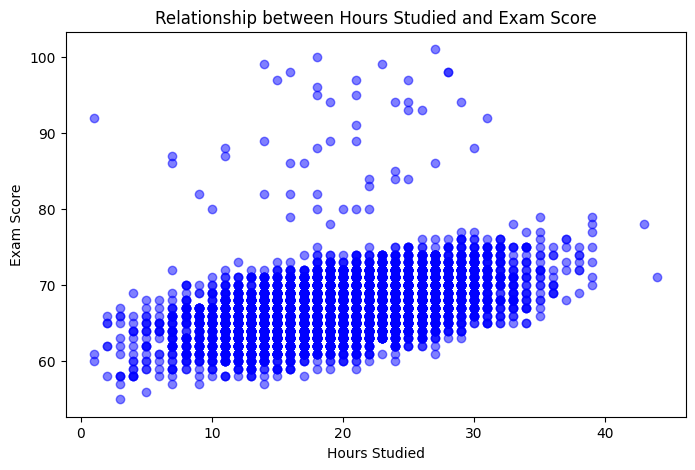

In [4]:
plt.figure(figsize=(8,5))
plt.scatter(df["Hours_Studied"], df["Exam_Score"], alpha=0.5, color="blue")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Relationship between Hours Studied and Exam Score")
plt.show()


y = df["Exam_Score"]

**Step 5:  Helper function for evaluation**

In [6]:
def evaluate_model(X, y, degree=None):
    # Fits linear or polynomial regression, returns metrics.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if degree:
        poly = PolynomialFeatures(degree=degree)
        X_train = poly.fit_transform(X_train)
        X_test = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return mae, rmse, r2, model, X_test, y_test, y_pred

**Step 6: Model 1: Hours_Studied only**

In [9]:
X1 = df[["Hours_Studied"]]

mae_lin1, rmse_lin1, r2_lin1, model1, X1_test, y1_test, y1_pred = evaluate_model(X1, y)
mae_poly1, rmse_poly1, r2_poly1, _, _, _, _ = evaluate_model(X1, y, degree=2)

print("Model 1: Hours_Studied only")
print("Linear -> MAE:", mae_lin1, "RMSE:", rmse_lin1, "R²:", r2_lin1)
print("Polynomial -> MAE:", mae_poly1, "RMSE:", rmse_poly1, "R²:", r2_poly1)


Model 1: Hours_Studied only
Linear -> MAE: 2.4475687452945643 RMSE: 3.294832513010839 R²: 0.2319868674542106
Polynomial -> MAE: 2.4447795821288105 RMSE: 3.2931729586684346 R²: 0.23276034442853466


**Model 1 Visualization**

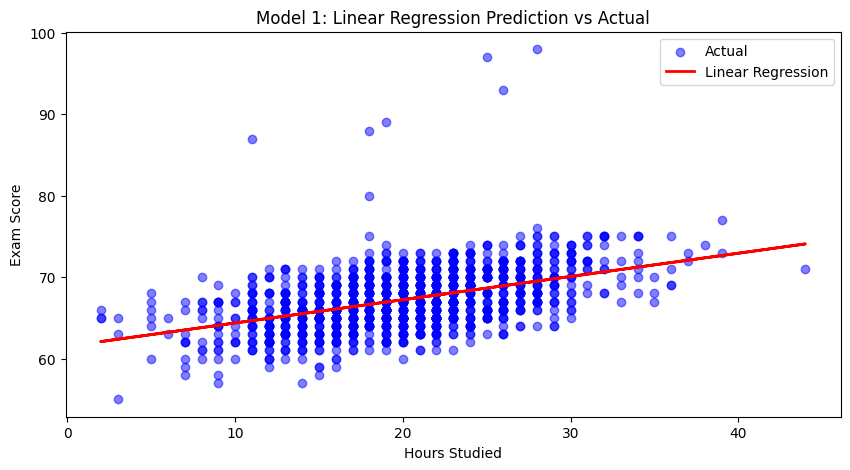

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(X1_test, y1_test, color="blue", alpha=0.5, label="Actual")
plt.plot(X1_test, y1_pred, color="red", linewidth=2, label="Linear Regression")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Model 1: Linear Regression Prediction vs Actual")
plt.legend()
plt.show()


**Step 7: Model 2: Hours_Studied + Sleep_Hours + Attendance**

In [12]:
X2 = df[["Hours_Studied", "Sleep_Hours", "Attendance"]]

mae_lin2, rmse_lin2, r2_lin2, _, _, _, _ = evaluate_model(X2, y)
mae_poly2, rmse_poly2, r2_poly2, _, _, _, _ = evaluate_model(X2, y, degree=2)

print("Model 2: Hours_Studied + Sleep_Hours + Attendance")
print("Linear -> MAE:", mae_lin2, "RMSE:", rmse_lin2, "R²:", r2_lin2)
print("Polynomial -> MAE:", mae_poly2, "RMSE:", rmse_poly2, "R²:", r2_poly2)

Model 2: Hours_Studied + Sleep_Hours + Attendance
Linear -> MAE: 1.4706300773376368 RMSE: 2.412019889780555 R²: 0.5884110279740731
Polynomial -> MAE: 1.4693633987050112 RMSE: 2.414268879856837 R²: 0.5876431312711112


**Step 8:Model 3: Hours_Studied + Previous_Scores + Sleep_Hours + Attendance**

In [13]:
X3 = df[["Hours_Studied", "Previous_Scores", "Sleep_Hours", "Attendance"]]

mae_lin3, rmse_lin3, r2_lin3, _, _, _, _ = evaluate_model(X3, y)
mae_poly3, rmse_poly3, r2_poly3, _, _, _, _ = evaluate_model(X3, y, degree=2)

print("Model 3: Hours_Studied + Previous_Scores + Sleep_Hours + Attendance")
print("Linear -> MAE:", mae_lin3, "RMSE:", rmse_lin3, "R²:", r2_lin3)
print("Polynomial -> MAE:", mae_poly3, "RMSE:", rmse_poly3, "R²:", r2_poly3)


Model 3: Hours_Studied + Previous_Scores + Sleep_Hours + Attendance
Linear -> MAE: 1.3608889224810523 RMSE: 2.312088040154945 R²: 0.6218094307179827
Polynomial -> MAE: 1.3609149419281616 RMSE: 2.314837055503931 R²: 0.6209095776658797


**Step 9: Summary Table**

In [14]:
results = pd.DataFrame({
    "Model": ["Hours_Studied only (Linear)", "Hours_Studied only (Poly deg=2)",
              "Hours+Sleep+Attendance (Linear)", "Hours+Sleep+Attendance (Poly deg=2)",
              "Hours+PrevScores+Sleep+Attendance (Linear)", "Hours+PrevScores+Sleep+Attendance (Poly deg=2)"],
    "MAE": [mae_lin1, mae_poly1, mae_lin2, mae_poly2, mae_lin3, mae_poly3],
    "RMSE": [rmse_lin1, rmse_poly1, rmse_lin2, rmse_poly2, rmse_lin3, rmse_poly3],
    "R²": [r2_lin1, r2_poly1, r2_lin2, r2_poly2, r2_lin3, r2_poly3]
})

print("Summary of Model Performances")
print(results)

Summary of Model Performances
                                            Model       MAE      RMSE  \
0                     Hours_Studied only (Linear)  2.447569  3.294833   
1                 Hours_Studied only (Poly deg=2)  2.444780  3.293173   
2                 Hours+Sleep+Attendance (Linear)  1.470630  2.412020   
3             Hours+Sleep+Attendance (Poly deg=2)  1.469363  2.414269   
4      Hours+PrevScores+Sleep+Attendance (Linear)  1.360889  2.312088   
5  Hours+PrevScores+Sleep+Attendance (Poly deg=2)  1.360915  2.314837   

         R²  
0  0.231987  
1  0.232760  
2  0.588411  
3  0.587643  
4  0.621809  
5  0.620910  
